In [39]:
from skimage.color import rgb2lab, deltaE_ciede2000
import numpy as np
def hex_to_rgb(hex_code):
    """Convert hex to RGB tuple (0-255)"""
    hex_code = hex_code.lstrip('#')
    return tuple(int(hex_code[i:i+2], 16) for i in (0, 2, 4))

def match_color_lab(target_hex, color_list, top_n=5):
    """
    Match color using LAB color space and Delta E CIE2000
    Most perceptually accurate method
    """
    # Convert target to LAB (divide by 255 to get 0-1 range)
    target_rgb = np.array(hex_to_rgb(target_hex), dtype=float) / 255.0
    target_rgb = target_rgb.reshape(1, 1, 3)
    target_lab = rgb2lab(target_rgb)[0, 0]

    matches = []
    for item in color_list:
        # Convert each color to LAB (divide by 255 to get 0-1 range)
        color_rgb = np.array(hex_to_rgb(item['hex']), dtype=float) / 255.0
        color_rgb = color_rgb.reshape(1, 1, 3)
        color_lab = rgb2lab(color_rgb)[0, 0]

        # Calculate Delta E distance
        distance = deltaE_ciede2000(target_lab, color_lab)
        matches.append((item['name'], item['hex'], distance))

    matches.sort(key=lambda x: x[2])
    return matches[:top_n]


In [40]:
import matplotlib.pyplot as plt

def show_color(hex_code):
    rgb_color = hex_to_rgb(hex_code)
    plt.figure(figsize=(2, 2))
    plt.imshow([[rgb_color]])
    plt.title(f'Color: {hex_code}')
    plt.axis('off')
    plt.show()


def show_matching_colors(results):
    num_colors = len(results)
    fig, axes = plt.subplots(1, num_colors, figsize=(num_colors * 2, 2))

    if num_colors == 1:
        axes = [axes] # Make it iterable if there's only one color

    for i, (name, hex_code, dist) in enumerate(results):
        rgb_color = hex_to_rgb(hex_code)
        axes[i].imshow([[rgb_color]])
        axes[i].set_title(f'{name}\n{hex_code}')
        axes[i].axis('off')
        print(f"  {name}: {hex_code} (ΔE: {dist})")

    plt.tight_layout()
    plt.show()

# Call the function with your results to display the colors
# show_matching_colors(results)

In [41]:
# Wide range of test colors organized by category
test_colors = [
    # Primary Colors
    {'name': 'Pure Red', 'hex': '#FF0000'},
    {'name': 'Pure Green', 'hex': '#00FF00'},
    {'name': 'Pure Blue', 'hex': '#0000FF'},

    # Secondary Colors
    {'name': 'Yellow', 'hex': '#FFFF00'},
    {'name': 'Cyan', 'hex': '#00FFFF'},
    {'name': 'Magenta', 'hex': '#FF00FF'},
    {'name': 'Orange', 'hex': '#FF8000'},
    {'name': 'Purple', 'hex': '#8000FF'},

    # Tertiary Colors
    {'name': 'Red-Orange', 'hex': '#FF4000'},
    {'name': 'Yellow-Orange', 'hex': '#FFBF00'},
    {'name': 'Yellow-Green', 'hex': '#BFFF00'},
    {'name': 'Blue-Green', 'hex': '#00FF80'},
    {'name': 'Blue-Violet', 'hex': '#4000FF'},
    {'name': 'Red-Violet', 'hex': '#BF00FF'},

    # Reds & Pinks
    {'name': 'Crimson', 'hex': '#DC143C'},
    {'name': 'Coral', 'hex': '#FF7F50'},
    {'name': 'Salmon', 'hex': '#FA8072'},
    {'name': 'Hot Pink', 'hex': '#FF69B4'},
    {'name': 'Pink', 'hex': '#FFC0CB'},
    {'name': 'Rose', 'hex': '#FF007F'},

    # Oranges & Browns
    {'name': 'Dark Orange', 'hex': '#FF8C00'},
    {'name': 'Peach', 'hex': '#FFDAB9'},
    {'name': 'Sienna', 'hex': '#A0522D'},
    {'name': 'Brown', 'hex': '#964B00'},
    {'name': 'Tan', 'hex': '#D2B48C'},
    {'name': 'Chocolate', 'hex': '#D2691E'},

    # Yellows & Golds
    {'name': 'Gold', 'hex': '#FFD700'},
    {'name': 'Lemon', 'hex': '#FFF44F'},
    {'name': 'Khaki', 'hex': '#C3B091'},
    {'name': 'Beige', 'hex': '#F5F5DC'},

    # Greens
    {'name': 'Lime', 'hex': '#00FF00'},
    {'name': 'Forest Green', 'hex': '#228B22'},
    {'name': 'Olive', 'hex': '#808000'},
    {'name': 'Mint', 'hex': '#98FF98'},
    {'name': 'Emerald', 'hex': '#50C878'},
    {'name': 'Teal', 'hex': '#008080'},
    {'name': 'Sea Green', 'hex': '#2E8B57'},

    # Blues
    {'name': 'Sky Blue', 'hex': '#87CEEB'},
    {'name': 'Navy', 'hex': '#000080'},
    {'name': 'Royal Blue', 'hex': '#4169E1'},
    {'name': 'Turquoise', 'hex': '#40E0D0'},
    {'name': 'Steel Blue', 'hex': '#4682B4'},
    {'name': 'Indigo', 'hex': '#4B0082'},

    # Purples & Violets
    {'name': 'Lavender', 'hex': '#E6E6FA'},
    {'name': 'Violet', 'hex': '#EE82EE'},
    {'name': 'Plum', 'hex': '#DDA0DD'},
    {'name': 'Orchid', 'hex': '#DA70D6'},
    {'name': 'Deep Purple', 'hex': '#673AB7'},

    # Neutrals & Grayscale
    {'name': 'White', 'hex': '#FFFFFF'},
    {'name': 'Light Gray', 'hex': '#D3D3D3'},
    {'name': 'Gray', 'hex': '#808080'},
    {'name': 'Dark Gray', 'hex': '#404040'},
    {'name': 'Black', 'hex': '#000000'},
    {'name': 'Silver', 'hex': '#C0C0C0'},

    # Pastels
    {'name': 'Pastel Pink', 'hex': '#FFD1DC'},
    {'name': 'Pastel Blue', 'hex': '#AEC6CF'},
    {'name': 'Pastel Yellow', 'hex': '#FDFD96'},
    {'name': 'Pastel Green', 'hex': '#77DD77'},
    {'name': 'Pastel Purple', 'hex': '#B39EB5'},

    # Dark/Deep Colors
    {'name': 'Maroon', 'hex': '#800000'},
    {'name': 'Dark Red', 'hex': '#8B0000'},
    {'name': 'Dark Green', 'hex': '#006400'},
    {'name': 'Dark Blue', 'hex': '#00008B'},
    {'name': 'Dark Violet', 'hex': '#9400D3'},
]

# Minimal 12-color set for quick testing
quick_test_colors = [
    {'name': 'Red', 'hex': '#FF0000'},
    {'name': 'Orange', 'hex': '#FF8000'},
    {'name': 'Yellow', 'hex': '#FFFF00'},
    {'name': 'Lime', 'hex': '#80FF00'},
    {'name': 'Green', 'hex': '#00FF00'},
    {'name': 'Cyan', 'hex': '#00FFFF'},
    {'name': 'Blue', 'hex': '#0000FF'},
    {'name': 'Purple', 'hex': '#8000FF'},
    {'name': 'Magenta', 'hex': '#FF00FF'},
    {'name': 'White', 'hex': '#FFFFFF'},
    {'name': 'Gray', 'hex': '#808080'},
    {'name': 'Black', 'hex': '#000000'},
]


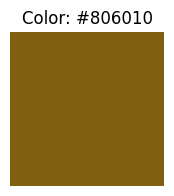


LAB Delta E (most accurate):
  Brown: #964B00 (ΔE: 14.002601547632317)
  Olive: #808000 (ΔE: 15.254733468037674)
  Sienna: #A0522D (ΔE: 18.433111870321405)


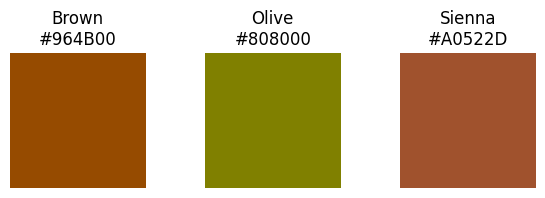

In [49]:
colors = test_colors

target = "#806010"
show_color(target)

print("\nLAB Delta E (most accurate):")
results = match_color_lab(target, colors, top_n=3)
show_matching_colors(results)